In [1]:
import torch
import torch.nn as nn
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
tv1 = torch.tensor([1, 2, 3, 0])
tv2 = torch.tensor([1, 2, 3, 1])
torch.dot(tv1, tv2), torch.sum(tv1 * tv2)


(tensor(14), tensor(14))

In [3]:
tv1 = torch.tensor([[1, 2, 3, 0], [1, 2, 3, 0]])
tv2 = torch.tensor([1, 2, 3, 1])
tv1 @ tv2


tensor([14, 14])

In [4]:
softfun = nn.Softmax(dim=0)


In [5]:
z = torch.rand(10)
z, softfun(z), sum(softfun(z))


(tensor([0.2694, 0.7301, 0.4841, 0.4619, 0.7839, 0.7661, 0.1039, 0.5392, 0.5299,
         0.8969]),
 tensor([0.0731, 0.1159, 0.0906, 0.0886, 0.1223, 0.1201, 0.0619, 0.0957, 0.0948,
         0.1369]),
 tensor(1.0000))

In [6]:
torch.max(torch.log(z)), torch.argmax(torch.log(z)), z[
    torch.argmax(torch.log(z))
], torch.log(z[torch.argmax(torch.log(z))])


(tensor(-0.1088), tensor(9), tensor(0.8969), tensor(-0.1088))

In [7]:
for i in range(10):
    torch.manual_seed(555)
    print(torch.rand(3))


tensor([0.7655, 0.4534, 0.2509])
tensor([0.7655, 0.4534, 0.2509])
tensor([0.7655, 0.4534, 0.2509])
tensor([0.7655, 0.4534, 0.2509])
tensor([0.7655, 0.4534, 0.2509])
tensor([0.7655, 0.4534, 0.2509])
tensor([0.7655, 0.4534, 0.2509])
tensor([0.7655, 0.4534, 0.2509])
tensor([0.7655, 0.4534, 0.2509])
tensor([0.7655, 0.4534, 0.2509])


In [8]:
import torch.nn.functional as F
import torch


In [9]:
p = torch.tensor([1.0, 0])
q = torch.tensor([0.25, 0.75])
F.binary_cross_entropy(q, p)


tensor(1.3863)

In [10]:
torch.log(torch.tensor(0.75))


tensor(-0.2877)

In [11]:
torch.cuda.device("cuda:0")


In [12]:
device = torch.device("cuda:0")


In [13]:
print(device)


cuda:0


In [375]:
def peaks(x, y):
    # expand to a 2D mesh
    x, y = np.meshgrid(x, y)

    z = (
        3 * (1 - x) ** 2 * np.exp(-(x**2) - (y + 1) ** 2)
        - 10 * (x / 5 - x**3 - y**5) * np.exp(-(x**2) - y**2)
        - 1 / 3 * np.exp(-((x + 1) ** 2) - y**2)
    )
    return z


x = np.linspace(-3, 3, 201)
y = np.linspace(-3, 3, 201)
Z = peaks(x, y)


In [336]:
def fx(x, y):
    return (
        3 * (1 - x) ** 2 * np.exp(-(x**2) - (y + 1) ** 2)
        - 10 * (x / 5 - x**3 - y**5) * np.exp(-(x**2) - y**2)
        - 1 / 3 * np.exp(-((x + 1) ** 2) - y**2)
    )


def deriv(x, y):
    h = 0.0001
    return np.array([(fx(x + h, y) - fx(x, y)) / h, (fx(x, y + h) - fx(x, y)) / h])


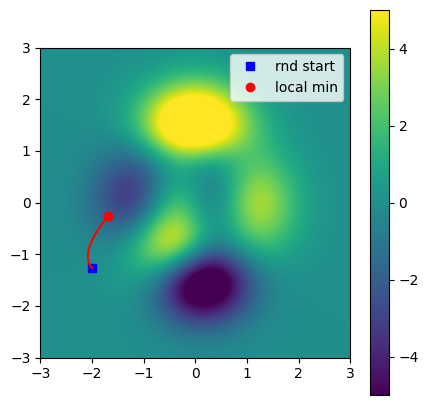

In [502]:
# localmin = np.array([-0.10431764, 0.71528765])
localmin = [np.random.choice(np.linspace(-2, 2), 2)]

learning_rate = 0.01
training_epoch = 100

for i in range(training_epoch):
    grad = deriv(*localmin[-1])
    localmin.append(localmin[-1] - learning_rate * grad)
localmin = np.array(localmin)

plt.figure(figsize=(5, 5))

plt.imshow(Z, extent=[x[0], x[-1], y[0], y[-1]], vmin=-5, vmax=5, origin="lower")
plt.plot(localmin[0][0], localmin[0][1], "bs")
plt.plot(localmin[-1][0], localmin[-1][1], "ro")
plt.plot(localmin[:, 0], localmin[:, 1], "r")

plt.legend(["rnd start", "local min"])
plt.colorbar()
plt.show()
plt.close()


In [6]:
import torch.nn.functional as F

In [ ]:

class ANNClass(nn.Module):
    def __init__(self) -> None:
        super(ANNClass, self).__init__()

        self.input = nn.Linear(2,1)
        self.relu = F.relu
        self.linear_layer = nn.Linear(1,1)
        self.sigmoid = nn.Sigmoid()


    def forward(self, x):
        x = self.input(x)
        x = self.relu(x)
        x = self.linear_layer(x)
        x = self.sigmoid(x)
        return x